In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from data_utils import get_snp_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
# Using custom function for quick snp500 data scraping
data = get_snp_data(start='2000-01-01')

[*********************100%***********************]  505 of 505 completed


In [87]:
# Count number of nans in each row
col_nan_counts = np.bincount(np.where(np.isnan(data.values))[1])

# Find percentage of cols in DF with > 4% nan values (turns out this is only ~10-12% of all cols)
nan_col_idx = np.where(col_nan_counts > len(data) // 25)[0]
nan_cols = data.columns[nan_col_idx]
data.drop(nan_cols, axis=1, inplace=True)

In [88]:
# get close data
close_data = data["Adj Close"]

# find the 5 highest growth companies over given time interval
growth = data["Adj Close"].iloc[-1] / data["Adj Close"].iloc[0]
growth.dropna(inplace=True)
megagrowth_symbols = growth.iloc[np.argsort(growth.values)[::-1][:5]].index.values

In [92]:
 growth.iloc[np.argsort(growth.values)[::-1][:5]]

MNST    1086.553074
ODFL     287.859062
NVDA     222.116306
TSCO     221.071019
AAPL     173.503677
dtype: float64

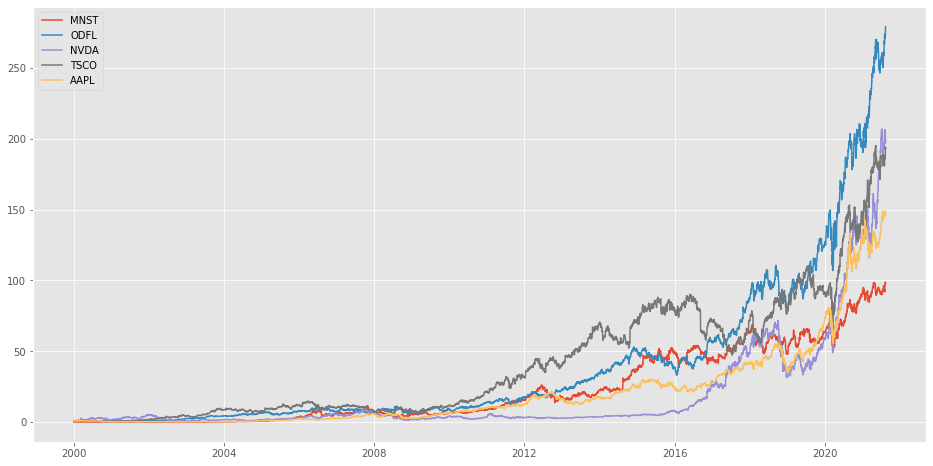

In [89]:
# plot of raw data for megagrowth group
plt.figure(figsize=(16, 8))
for col in megagrowth_symbols:
    plt.plot(close_data[col], label=col)

plt.legend()
plt.show()

In [90]:
def normalize(data):
    
    return (data - np.min(data)) / (np.max(data) - np.min(data))

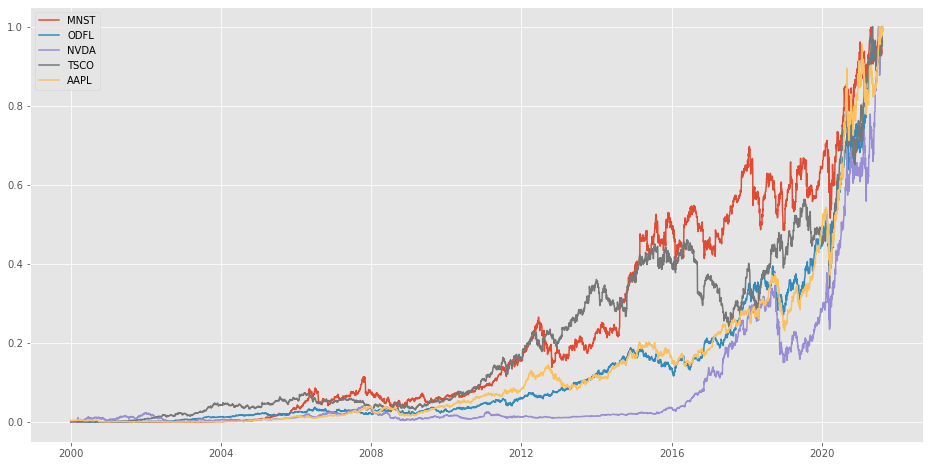

In [91]:
# plot of data normalized between (0,1) for megagrowth group
plt.figure(figsize=(16, 8))
for col in megagrowth_symbols:
    plt.plot(normalize(close_data[col]), label=col)

plt.legend()
plt.show()